## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('cs2m.csv')
df.head(2)

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR
0,100,150,20,0,0,0
1,120,160,16,0,0,0


In [6]:
df.Prgnt.value_counts()

0    15
1    15
Name: Prgnt, dtype: int64

<AxesSubplot:title={'center':'Age'}, xlabel='[Prgnt]'>

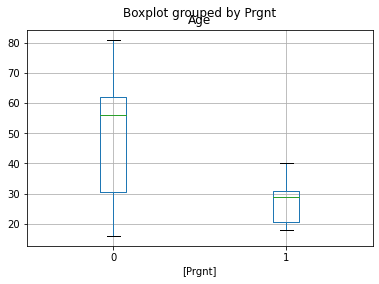

In [7]:
# plot the boxplot with age and pregnant

new=df[['Age','Prgnt']]
new.boxplot(by='Prgnt')

In [20]:
# will see those data practically by numbers
df.groupby('Prgnt')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Prgnt,,,,,,,,
0,15.0,48.000000,21.350811,16.0,30.5,56.0,62.0,81.0
1,15.0,27.533333,7.179999,18.0,20.5,29.0,31.0,40.0


In [21]:
# creating a new feature age_L&H where age is <32 print L and where age >32 pring H
df['age_L&H']=np.where(df['Age']<32,'L','H')
df.head(2)

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR,age_L&H
0,100,150,20,0,0,0,L
1,120,160,16,0,0,0,L


In [19]:
# if i want to write 3 condition over here
# like if the age is <20 print L if the age >=20 and <=35 print M and if the age >35 print H

def set_age(row):
    if row['Age']<20:
        return 'L'
    elif row['Age']>=20 and row['Age']<=35:
        return 'M'
    else:
        return 'H'
df=df.assign(AgeL_M_H=df.apply(set_age,axis=1))
df.head(5)

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR,age_L&H,AgeL_M_H
0,100,150,20,0,0,0,L,M
1,120,160,16,0,0,0,L,L
2,110,150,18,0,0,0,L,L
3,100,175,25,0,0,0,L,M
4,95,250,36,0,0,0,H,H


In [20]:
df.drop('AgeL_M_H',axis=1,inplace=True)

In [21]:
df.head()

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR,age_L&H
0,100,150,20,0,0,0,L
1,120,160,16,0,0,0,L
2,110,150,18,0,0,0,L
3,100,175,25,0,0,0,L
4,95,250,36,0,0,0,H


In [24]:
def set_age(data):
    if data['Age']<20:
        return 'L'
    elif data['Age']>=20 and data['Age']<=35:
        return 'M'
    else :
        return 'H'
    
df=df.assign(Age_L_H_M=df.apply(set_age,axis=1))

In [30]:
df.head()

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR,age_L&H,age_L_H_M
0,100,150,20,0,0,0,L,M
1,120,160,16,0,0,0,L,L
2,110,150,18,0,0,0,L,L
3,100,175,25,0,0,0,L,M
4,95,250,36,0,0,0,H,H


In [31]:
df.BP.describe()

count     30.000000
mean     127.333333
std       22.846313
min       95.000000
25%      111.250000
50%      122.500000
75%      143.750000
max      180.000000
Name: BP, dtype: float64

In [ ]:
# easy method
output=[]
for i in  df.Age:
    if i<20:
        output.append('L')
    elif i>=20 and i<=35:
        output.append('M')
    else:
        output.append('H')
df['L_M_H']=pd.DataFrame(output)
df.head()

In [37]:
def bp_range(data):
    if data['BP']<100:
        return 'The BP is Low'
    elif data['BP']>=100 and data['BP']<=150:
        return 'The BP is Normal'
    else:
        return 'The BP is High'
    
df=df.assign(BP_Details=df.apply(bp_range,axis=1))
df.head()

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR,age_L&H,age_L_H_M,BP_Details
0,100,150,20,0,0,0,L,M,The BP is Normal
1,120,160,16,0,0,0,L,L,The BP is Normal
2,110,150,18,0,0,0,L,L,The BP is Normal
3,100,175,25,0,0,0,L,M,The BP is Normal
4,95,250,36,0,0,0,H,H,The BP is Low


In [44]:
# easy way of droping the variable 
del df['BP_Details']

In [45]:
df.head()

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR,age_L&H,age_L_H_M
0,100,150,20,0,0,0,L,M
1,120,160,16,0,0,0,L,L
2,110,150,18,0,0,0,L,L
3,100,175,25,0,0,0,L,M
4,95,250,36,0,0,0,H,H


In [48]:
del df['age_L&H']

In [49]:
df.head()

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR,age_L_H_M
0,100,150,20,0,0,0,M
1,120,160,16,0,0,0,L
2,110,150,18,0,0,0,L
3,100,175,25,0,0,0,M
4,95,250,36,0,0,0,H


In [58]:
# you can write in this way or you can write in another way
df.groupby('Prgnt')['Age'].mean()

Prgnt
0    48.000000
1    27.533333
Name: Age, dtype: float64

In [60]:
df.Age.groupby(df.Prgnt).mean()

Prgnt
0    48.000000
1    27.533333
Name: Age, dtype: float64

In [61]:
# where i want to round up the above value for 2decimal
round(df.Age.groupby(df.Prgnt).mean(),2)

Prgnt
0    48.00
1    27.53
Name: Age, dtype: float64

In [62]:
df.Age.groupby(df.Prgnt).describe()

,count,mean,std,min,25%,50%,75%,max
Prgnt,,,,,,,,
0,15.0,48.000000,21.350811,16.0,30.5,56.0,62.0,81.0
1,15.0,27.533333,7.179999,18.0,20.5,29.0,31.0,40.0


In [63]:
df.columns

Index(['BP', 'Chlstrl', 'Age', 'Prgnt', 'AnxtyLH', 'DrugR', 'age_L_H_M'], dtype='object')

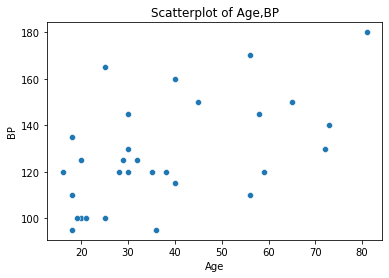

In [69]:
# Draw the scatterplot of age and bp

sns.scatterplot(df.Age,df.BP)
plt.title('Scatterplot of Age,BP')
plt.show()

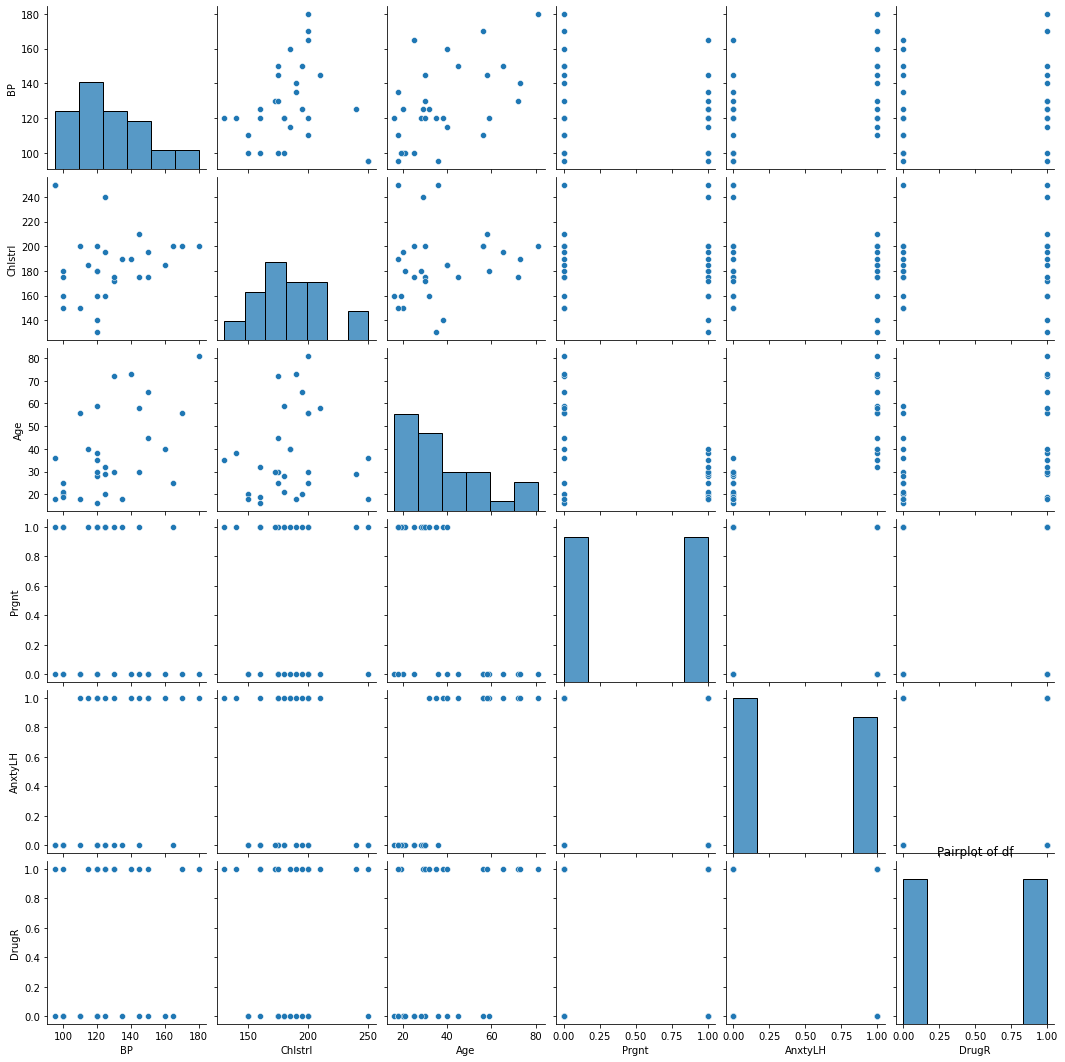

In [70]:
# perform the pair plot of the entire dataset

sns.pairplot(df)
plt.title('Pairplot of df')
plt.show()

In [73]:
from scipy import stats

In [74]:
# Will check IQR using stats module
stats.iqr(df.Age)

31.25

In [75]:
# Will check IQR manully

Q3=df.Age.quantile(0.75)
Q1=df.Age.quantile(0.25)
IQR=Q3-Q1
print(IQR)

31.25


# Task to be performed

### Task1: All  0s(zeros) in columns B to be changed to 2
### Task2: In column c, stella to be replaced by steffi
### Task3: Column names to be A as Marks, B as Section, D as Names

In [77]:
# Task1

df=pd.read_excel('practice dataset.xlsx')
df

,A,B,D
0,12,0,jolly
1,21,0,dolly
2,13,1,mary
3,15,1,stella
4,16,0,bobby
5,23,1,honey
6,25,1,kety


In [84]:
df['B']=np.where(df.B==0,2,df.B)
df

,A,B,D
0,12,2,jolly
1,21,2,dolly
2,13,1,mary
3,15,1,stella
4,16,2,bobby
5,23,1,honey
6,25,1,kety


In [88]:
# or you can change like this    # now will change 2 to 0
df.B.replace(2,0,inplace=True)
df

,A,B,D
0,12,0,jolly
1,21,0,dolly
2,13,1,mary
3,15,1,steffi
4,16,0,bobby
5,23,1,honey
6,25,1,kety


In [85]:
# Task 2

df.D=np.where(df.D=='stella','steffi',df.D)
df

,A,B,D
0,12,2,jolly
1,21,2,dolly
2,13,1,mary
3,15,1,steffi
4,16,2,bobby
5,23,1,honey
6,25,1,kety


In [90]:
df.D.replace('steffi','stella',inplace=True)
df

,A,B,D
0,12,0,jolly
1,21,0,dolly
2,13,1,mary
3,15,1,stella
4,16,0,bobby
5,23,1,honey
6,25,1,kety


In [94]:
df.rename(columns={"A":'Marks','B':'Section','D':'Names'},inplace=True)
df

,Marks,Section,Names
0,12,0,jolly
1,21,0,dolly
2,13,1,mary
3,15,1,stella
4,16,0,bobby
5,23,1,honey
6,25,1,kety


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('cs2m.csv')
df.head(2)

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR
0,100,150,20,0,0,0
1,120,160,16,0,0,0


In [3]:
output=[]
for i in  df.Age:
    if i<20:
        output.append('L')
    elif i>=20 and i<=35:
        output.append('M')
    else:
        output.append('H')
df['L_M_H']=pd.DataFrame(output)
df.head()

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR,L_M_H
0,100,150,20,0,0,0,M
1,120,160,16,0,0,0,L
2,110,150,18,0,0,0,L
3,100,175,25,0,0,0,M
4,95,250,36,0,0,0,H


In [4]:
df.drop('L_M_H',axis=1,inplace=True)

In [5]:
def set_value(data):
    if data['Age']<20:
        return 'L'
    elif data['Age']>=20 and data['Age']<=35:
        return 'M'
    else:
        return 'H'
    

In [6]:
df=df.assign(L_H_M=df.apply(set_value,axis=1))

In [7]:
df.head()

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR,L_H_M
0,100,150,20,0,0,0,M
1,120,160,16,0,0,0,L
2,110,150,18,0,0,0,L
3,100,175,25,0,0,0,M
4,95,250,36,0,0,0,H


<AxesSubplot:title={'center':'Age'}, xlabel='[Prgnt]'>

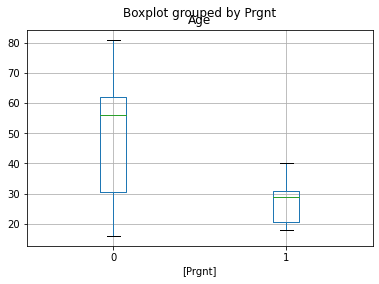

In [12]:
new=df[['Age','Prgnt']]
new.boxplot(by='Prgnt')

In [15]:
df.columns

Index(['BP', 'Chlstrl', 'Age', 'Prgnt', 'AnxtyLH', 'DrugR'], dtype='object')

In [16]:
df.head()

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR
0,100,150,20,0,0,0
1,120,160,16,0,0,0
2,110,150,18,0,0,0
3,100,175,25,0,0,0
4,95,250,36,0,0,0


In [22]:
df['Age_L_H']=np.where(df.Age<29,'L','H')

In [23]:
df.head()

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR,Age_L_H
0,100,150,20,0,0,0,L
1,120,160,16,0,0,0,L
2,110,150,18,0,0,0,L
3,100,175,25,0,0,0,L
4,95,250,36,0,0,0,H


In [26]:
df.Age_L_H.replace({'L':'Lower Age','H':'Higher Age'},inplace=True)
df.head()

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR,Age_L_H
0,100,150,20,0,0,0,Lower Age
1,120,160,16,0,0,0,Lower Age
2,110,150,18,0,0,0,Lower Age
3,100,175,25,0,0,0,Lower Age
4,95,250,36,0,0,0,Higher Age


In [29]:
df.Age.groupby(df['Prgnt']).mean()

Prgnt
0    48.000000
1    27.533333
Name: Age, dtype: float64

In [30]:
df.Chlstrl.describe()

count     30.000000
mean     185.066667
std       28.462841
min      130.000000
25%      172.750000
50%      182.500000
75%      200.000000
max      250.000000
Name: Chlstrl, dtype: float64

In [31]:
df['chlstrl_L_H']=np.where(df.Chlstrl<150,'L','H')

In [32]:
df.columns

Index(['BP', 'Chlstrl', 'Age', 'Prgnt', 'AnxtyLH', 'DrugR', 'Age_L_H',
       'chlstrl_L_H'],
      dtype='object')

<AxesSubplot:title={'center':'Age'}, xlabel='[chlstrl_L_H]'>

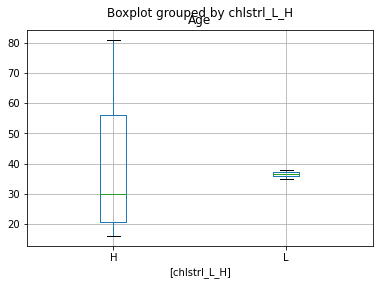

In [33]:
chl=df[['Age','chlstrl_L_H']]
chl.boxplot(by='chlstrl_L_H')

In [35]:
df.groupby('chlstrl_L_H')['Age'].mean()

chlstrl_L_H
H    37.857143
L    36.500000
Name: Age, dtype: float64

In [36]:
df.columns

Index(['BP', 'Chlstrl', 'Age', 'Prgnt', 'AnxtyLH', 'DrugR', 'Age_L_H',
       'chlstrl_L_H'],
      dtype='object')

<AxesSubplot:title={'center':'Age'}, xlabel='[Prgnt]'>

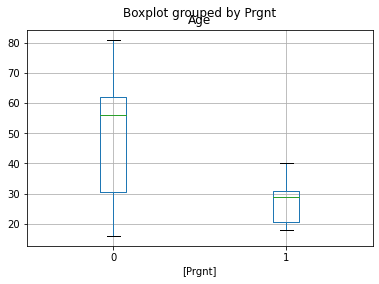

In [37]:
plot=df[['Age', 'Prgnt']]
plot.boxplot(by='Prgnt')